<a href="https://colab.research.google.com/github/Steve-YJ/Exp-Standalone-DeepLearning/blob/master/Code_Lec1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning 홀로서기 

* Reference: <a href='https://github.com/heartcored98/Standalone-DeepLearning'>Standalone-DeepLearning</a>
* Date: 20.07.18.sat. am7:00
* Notice
    * 본 노트북은 KAIST Standalone-DeepLearning을 공부하며 작성한 노트북입니다.
    * 개인 학습 목적으로 Coding Skill 향상과 이론적인 이해를 지향합니다

* Review<br>
    ✅ Quick Code-Review<br>
    ✅ Code-Review II<br>
    better understand about cost function <br>
    Re-Start!! -20.08.18.Tue-
---

# Lab1. Linear-Regression(from python, from scratch)

본 실습에서는 Regression Problem에 대하여 Linear Regression Hypothesis를 적용해봅니다. <code>pytorch</code>. <code>numpy</code>. <code>pandas</code> 등을 사용하지 않고 구현을 하는 것이 이번 실습의 묘미라고 합니다...ㅎㅎ

<br>
(본 실습에서는 구글 Colab 환경에서 Notebook을 작성할 줄 안다는 가정하에 바로 실습을 진행하도로 하겠습니다.)<br>
<br>
Google Drive에서 Colab을 사용하는 방법은 Googling을 활용하시길 바랍니다.(또는 <a src='https://colab.research.google.com/notebooks/io.ipynb'>링크 참고</a>)

앞으로 배우게 될 Deep Learning의 학습과정에 대해 익숙해지셨으면 합니다. 대부분의 일이 그렇듯 모델을 학습시키는 일 또한 일종의 '흐름'이 있습니다.<br><br>

실습의 구성(일종의 목차)

<ol>
    <li>Data Generation(Preparation)</li>
    <li>Hypothesis Define(Model Define)</li>
    <li>Cost Function Define(Loss Function Define)</li>
    <li>Gradient Descent</li> 
</ol>

## 1. Data Generation(Preparation)

Linear Regression 실습에 사용할 데이터로 공부한 시간에 따른 성적 데이터를 만들어 봅니다.

In [1]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [2]:
# 좀 더 Fancy한 방법으로 list를 생성해 줄 수 있습니다!

X = [i for i in range(10)]
print(X)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
X = [i for i in range(10)]
Y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10]

X, Y 데이터를 2D 평면상에 시각화해보도로 하겠습니다.<br>

matplotlibrary의 pyplot module을 사용합니다.<br>

* <code>plt.scatter()</code>

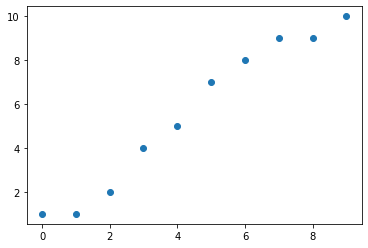

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.show()

## 2. Hypothesis(Model Define)

Linear Regression시에 활용하는 Hypothesis로는 <code>f(x) = Wx</code>를 사용하겠습니다<br>


In [5]:
# class를 사용해 구현해보도록 하겠습니다.
# 우선은 class에 대해 잘 모르시더라도 '흐름'을 생각하며 따라와주시길 바랍니다.

class H():
    def __init__(self, w):
        self.w = w

    def forward(self, x):
        return self.w*x


In [6]:
# make model

h = H(4)  # h = 4x라는 모델이 만들어졌습니다
pred_y = h.forward(5)  # x=5라는 인스턴스(또는 샘플)이 input으로 들어왔을 때, f(5) = 4x5를 통해 20이 정상적으로 출력되는지 확인해봅니다
# print(pred_y)

print('value of f(5) :', pred_y)
print('value of w :', h.w)

value of f(5) : 20
value of w : 4


hypothesis(model)의 출력값이 올바르게 출력된 것을 확인할 수 있습니다.

## 3. Cost Function Define(Loss Function Define)



이론시간에 우리가 배운 것이 하나 더 있습니다. 바로 Cost Function(다른 말로 Loss Function)입니다.<br>
Regression Problem에서의 Cost Function을 작성해봅니다.<br>
<br>
✅ 여기서 잠깐! 한 가지 짚고 넘어가도록 하겠습니다<br>
* Reference: https://deepinsight.tistory.com/123
<br>


Deep Neural Network의 학습에서 Loss Function은 <code>두 가지 가정</code>을 합니다
<ol>
<li>전체 Training data에 대한 Loss Function의 값은 각 Loss Function에 대한 합입니다</li>
<li>Network 출력값과 타겟(target)에 대한 Loss를 구합니다</li>
</ol>

다시말해 Loss를 구하는 방법은 출력값과 타겟값의 차이를 구하는 것입니다. 전체 데이터에 대한 Loss Function의 합은 각각의 Loss 값의 합입니다.
 
<br>


Cost Function의 구현을 통해 살펴보도록 하겠습니다.

In [10]:
# calc cost

def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i]) - Y[i]) ** 2
    error = error / len(X)
    return error

# 위와 같이 cost function을 구할 수 있다

In [11]:
# Again, Define Hypothesis
h = H(4)  # 위에서 이미 한 번 생성해보았던 hypothesis를 다시 정의해 줍니다.

# hypothesis를 검증해보겠습니다
# 위에서 정의한 Loss Function(cost 함수)를 사용합니다
print('Cost value when w=4: ', cost(h, X, Y))

Cost value when w=4:  222.2


<code>H = 4x</code>라는 hypothesis는 우리가 가지고 있는 데이터에 대해서 222.2라는 Cost값을 가집니다. 상당히 큰 것 같습니다.

### better cost function
조금 더 나은 버전의 cost function을 구현해봅니다.

In [12]:
def better_cost(pred_y, true_y):
    error = 0 
    # iteration
    for i in range(len(X)):
        error += (pred_y[i] - true_y[i]) ** 2
    error = error / len(X)
    return error

위의 결과와 같은 결과가 나오는지 한 번 확인해 보겠습니다.

In [13]:
# pred_y == ?
# pred_y는 어떻게 구할 수 있을까요?
pred_y = [h.forward(X[i]) for i in range(len(X))]

print('cost value with bettoer code structure: ', better_cost(pred_y, Y))  # it must be same to the result of cost

cost value with bettoer code structure:  222.2


In [14]:
h = H(4)
pred_y = [h.forward(X[i]) for i in range(len(X))]
cost(h, X, Y) == better_cost(pred_y, Y)

True

같은 결과를 얻을 수 있습니다

### Cost Surface Visualization

위에서 w=4인 경우에 대해서 cost를 확인해 보았습니다. 이번엔 다양한 w에 대해 cost값이 어떻게 바뀌는지 확인해 보겠습니다.

In [15]:
list_w = []
list_c = []

# make many w and calc cost
for i in range(-20, 20):
    w = i * 0.5
    h = H(w)
    c = cost(h, X, Y)
    list_w.append(w)  # append w to list_w
    list_c.append(c)  # append c to list_c

이제 cost function을 시각화해봅니다.

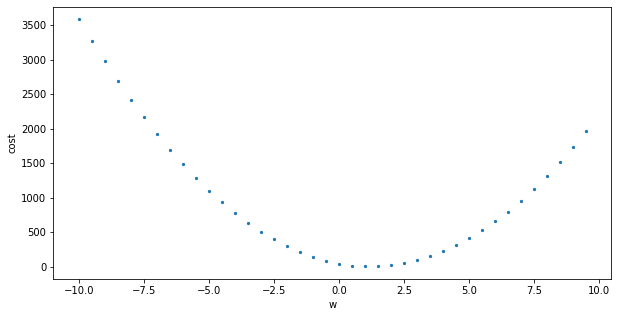

In [16]:
# plt.plot 대신 plt.figure()를 사용합니다

plt.figure(figsize=(10, 5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=5)

w가 0에서 2.5사이일 때 cost가 낮아지는 것을 확인할 수 있습니다

## Gradient Descent(마지막!)

이제 특정 w근방에서의 w에 대한 cost의 편미분(지금 변수가 하나라 그냥 미분과 다름이 없습니다만!)을 구해보겠습니다<br>
여기서는 두 가지 방식으로 gradient를 구합니다<br>

<ol>
<li>수치해석적으로 w=4인 지점과 w=4+eps인 지점의 cost 값을 각각 구한 뒤 두 값의 차이를 통해 gradient를 구합니다
</li>
<li>cost function을 w로 편미분한 공식을 통해 바로 특정 w에서의 gradient를 구합니다</li>
</ol>

### Compare two approach in order to compute Gradient
* Analytic
* Formula
<br><br>


수치해석적 방법으로 Gradient를 구하는 방법과 편미분 공식을 통해 Gradient를 구하는 방법을 비교해보도록 하겠습니다.

In [17]:
def cal_grad(w, cost):  # 수치해석적으로 gradient를 근사해봅니다.
    h = H(w)
    cost1 = cost(h, X, Y)
    eps = 0.00001
    h = H(w+eps)  # w에서 epsilon만큼 떨어진 부분에서 cost를 구해줍니다.
    cost2 = cost(h, X, Y)
    dcost = cost2 - cost1  # 두 cost function의 차이를 구해줍니다.

    dw = eps
    grad = dcost / dw
    return grad, (cost1 + cost2) * 0.5

def cal_grad2(w, cost):  # 편미분한 공식에 바로 대입하여 gradient를 근사해봅니다
    h = H(w)
    grad = 0

    for i in range(len(X)):
        grad += 2*(h.forward(X[i]) - Y[i]) * X[i]
    
    grad = grad / len(X)
    c = cost(h, X, Y)
    return grad, c

조금은 그럴듯한 학습을 한 번 해보겠습니다<br>
아래 실습 코드는 딥러닝의 학습방식과 유사한면이 있습니다.

1.2105213157896242 0.43684210597565787 1.2105263157894737 0.43684210526315803


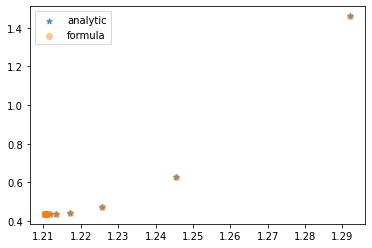

In [18]:
# 두 방식을 이용해서 w = 1.4 라는 지점에서 모델을 각각 초기화한 뒤에 Gradient Descent Algorithm 을 통해 내려갔을 때 거의 같은 결과가 나오는지 확인해봅시다.
w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100): # 총 100번의 Iteration(반복)을 통해서 학습을 진행해봅시다.
    grad, mean_cost = cal_grad(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    
print(w1, mean_cost, w2, mean_cost2) # 100번의 학습이 끝난 뒤에 w1 과 w2 를 출력해보니 둘다 1.21 정도로 비슷한 값으로 수렴한 것을 확인할 수 있습니다.
  
# 매 Iteration에서의 w 값과 cost 값을 그래프 상에 찍어보면 둘이 거의 정확하게 같은 지점을 통과하므로 초록색 동그라미가 파란색 별표를 가립니다.
plt.scatter(list_w1, list_c1, label='analytic', marker='*', alpha=0.7)
plt.scatter(list_w2, list_c2, label='formula', alpha=0.4)
plt.legend()

1.2105263157894737 0.43684210526315803 1.2105263157894737 0.43684210526315803


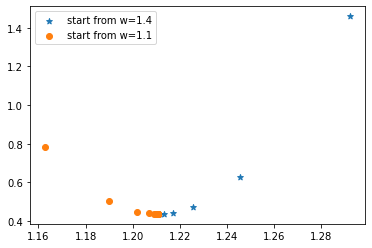

In [19]:
# 편미분 공식을 활용해서 Gradient Descent를 진행하되 서로 다른 w 지점으로 초기화 되었을 때 학습 양상을 확인해봅시다
w1 = 1.4
w2 = 1.1
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100): # 총 100번의 Iteration(반복)을 통해서 학습을 진행해봅시다.
    grad, mean_cost = cal_grad2(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    
print(w1, mean_cost, w2, mean_cost2) # 100번의 학습이 끝난 뒤에 w1 과 w2 를 출력해보니 둘다 1.21 정도로 비슷한 값으로 수렴한 것을 확인할 수 있습니다.
  
# 서로 다른 지점으로부터 시작하였더라도 학습이 진행됨에 따라 둘 다 같은 파라미터(w=1.21)로 수렴하는 양상을 확인할 수 있습니다.
plt.scatter(list_w1, list_c1, label='start from w=1.4', marker='*')
plt.scatter(list_w2, list_c2, label='start from w=1.1')
plt.legend()

## Summary


### Sum1. plot Loss Graph

In [20]:
X = [i for i in range(10)]
Y = [1, 1, 2, 3, 4, 5, 6, 7, 7, 9]

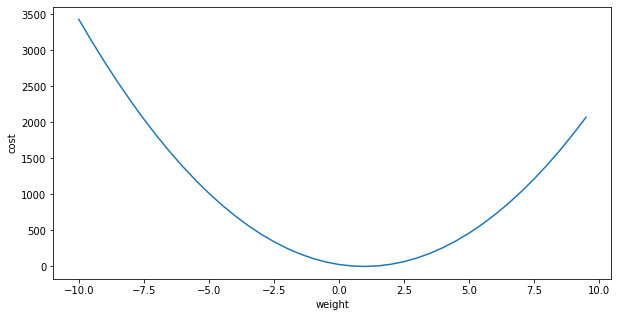

In [21]:
# Define Hypothesis
class H:
    def __init__(self, w):
        self.w = w

    def forward(self, X):
        return self.w * X

# Define Cost Function
def cost(h, X, Y):
    cost = 0  # initialize
    return sum([(h.forward(X[i]) - Y[i]) ** 2 for i in range(len(X))]) / len(X) 

list_w = []
list_c = []

for i in range(-20, 20):
    w = i*0.5
    h = H(w)
    c = cost(h, X, Y)
    list_w.append(w)
    list_c.append(c)

# plot
plt.figure(figsize=(10, 5))
plt.xlabel('weight')
plt.ylabel('cost')
# plt.scatter(list_w, list_c)
plt.plot(list_w, list_c)

### Sum2. Gradient Descent

* Gradient Descent
    * Analytic
    * Fomula


0.9719248245615029 0.17754386036162279 0.9719298245614035 0.17754385964912273


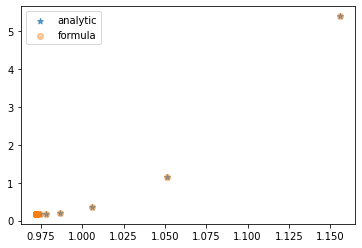

In [22]:
# 1. Analytic Gradient
def cal_grad(w, cost):
    h = H(w)
    cost1 = cost(h, X, Y)
    eps = 0.00001
    h = H(w+eps)
    cost2 = cost(h, X, Y)
    dcost = cost2 - cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost1+cost2)*0.5

# 2. Fomula Gradient
def cal_grad2(w, cost):
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]
    grad = grad / len(X)
    c = cost(h, X, Y)
    return grad, c

# 두 방식을 이용해 w=1.4라는 지점에서 모델을 각각 초기화한 뒤, Gradient Algorithm을 통해 내려갔을 때 거의 같은 결과가 나오는지 확인해 본다
w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

# 100 Epoch을 학습한다.
# 전체 데이터에 대해 100번 학습한다고 생각해보자
for i in range(100):
    grad, mean_cost = cal_grad(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad   # w1 = w0 -lr * gradient
    w2 -= lr * grad2  # " same
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)

print(w1, mean_cost, w2, mean_cost2)

plt.scatter(list_w1, list_c1, label='analytic', marker='*', alpha=0.7)
plt.scatter(list_w2, list_c2, label='formula', alpha=0.4)
plt.legend()

0.9719248245615029 0.17754386036162279 0.9719298245614035 0.17754385964912273


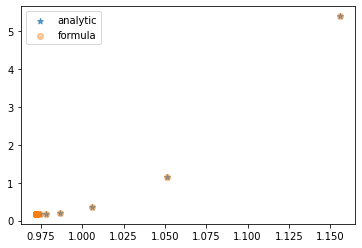

In [23]:
# 1. Analytic Gradient
def cal_grad(w, cost):
    h = H(w)
    cost1 = cost(h, X, Y)
    eps = 0.00001
    h = H(w+eps)
    cost2 = cost(h, X, Y)
    dcost = cost2 - cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost1+cost2)*0.5

# 2. Fomula Gradient
def cal_grad2(w, cost):
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]
    grad = grad / len(X)
    c = cost(h, X, Y)
    return grad, c

# 두 방식을 이용해 w=1.4라는 지점에서 모델을 각각 초기화한 뒤, Gradient Algorithm을 통해 내려갔을 때 거의 같은 결과가 나오는지 확인해 본다
w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

# 100 Epoch을 학습한다.
# 전체 데이터에 대해 100번 학습한다고 생각해보자
for i in range(100):
    grad, mean_cost = cal_grad(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad   # w1 = w0 -lr * gradient
    w2 -= lr * grad2  # " same
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)

print(w1, mean_cost, w2, mean_cost2)

plt.scatter(list_w1, list_c1, label='analytic', marker='*', alpha=0.7)
plt.scatter(list_w2, list_c2, label='formula', alpha=0.4)
plt.legend()